In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from pixood import PixOOD

## Load test image

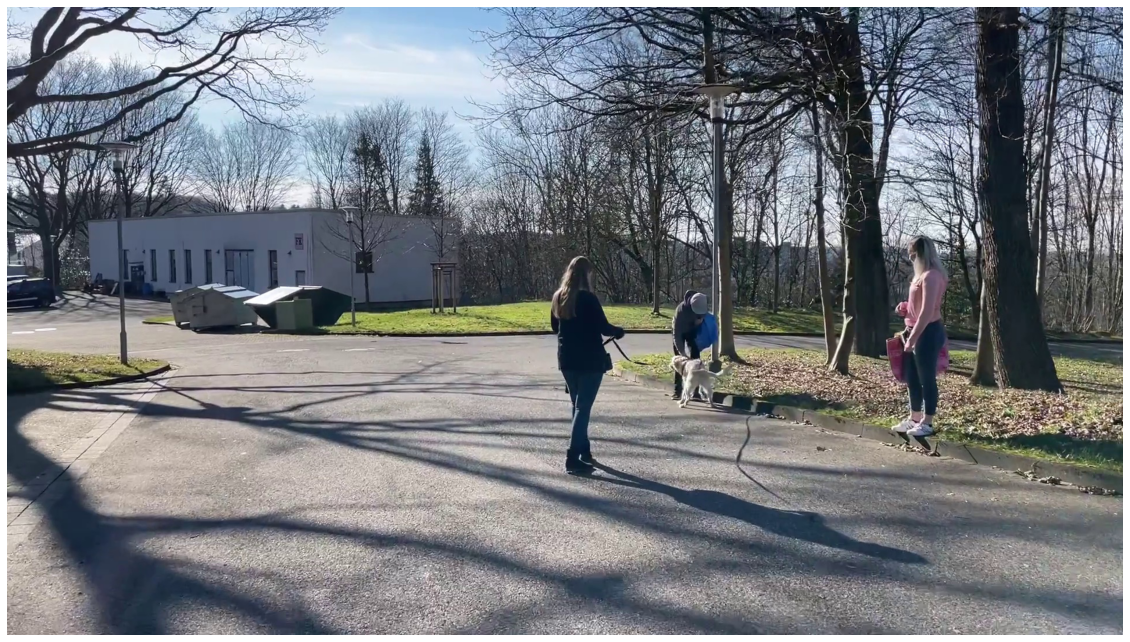

In [2]:
# the test image is from the WOS dataset (https://zenodo.org/records/12188586) "sequence_001" file "000032.png"
pil_img = Image.open("./assets/test_image.png")
img_grayscale = np.repeat(np.array(pil_img.convert("L"))[:,:, None], 3, axis=2)

plt.figure(42, figsize=(20,20))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

## Download checkpoints and initialize the PixOOD method

In [3]:
# eval_scale_factor define upsampling ratio of features before ood score computation, in evaluations 7 was used (if you run out of GPU RAM decrease this to 5,3 or 1)
model = PixOOD(exp_dir = "./", eval_scale_factor=1)

./code <module 'grood' from '/home/vojirtom/code/_published/public/2024_PixOOD/./code/net/models/grood.py'>


Using cache found in /home/vojirtom/.cache/torch/hub/facebookresearch_dinov2_main
/home/vojirtom/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/vojirtom/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/vojirtom/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


Saved model stores only tranable weights of model --> disabling strict model loading
    Number of not matched parts:  0
-----------------
{}
-----------------
=> loaded checkpoint './checkpoints/checkpoint-backbone.pth' (epoch 13)
Saved model stores only tranable weights of model --> disabling strict model loading
    Number of not matched parts:  0
-----------------
{}
-----------------
=> loaded checkpoint './checkpoints/checkpoint-latest.pth' (epoch 1)
Using default road+sidewalk labels for anomaly detection!
Using emb scale factor 1


## Evaluate on the test image using road obstactle detection setting, i.e. everything which is not a "road" detect as anomaly

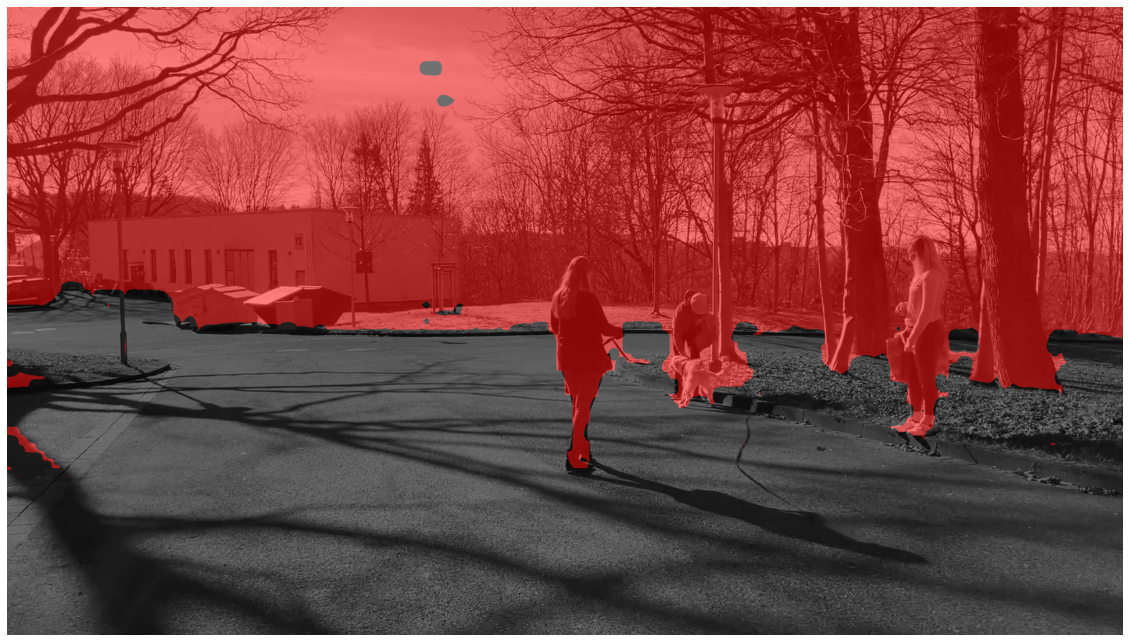

In [4]:
# threshold for anomaly score
threshold = 0.995

# example of use for road anomaly == using only "road" and "sidewalk" class
model.eval_labels = [0, 1]

out = model.evaluate(pil_img).detach().cpu().numpy()
score = out > threshold
blend = img_grayscale.copy()//2 
blend[:,:,0] += (128*(score).astype(np.uint8))

plt.figure(43, figsize=(20,20))
plt.imshow(blend)
plt.axis('off')
plt.show()

## Evaluate on the test image using all CityScapes labels, i.e. detect OOD w.r.t. CityScapes

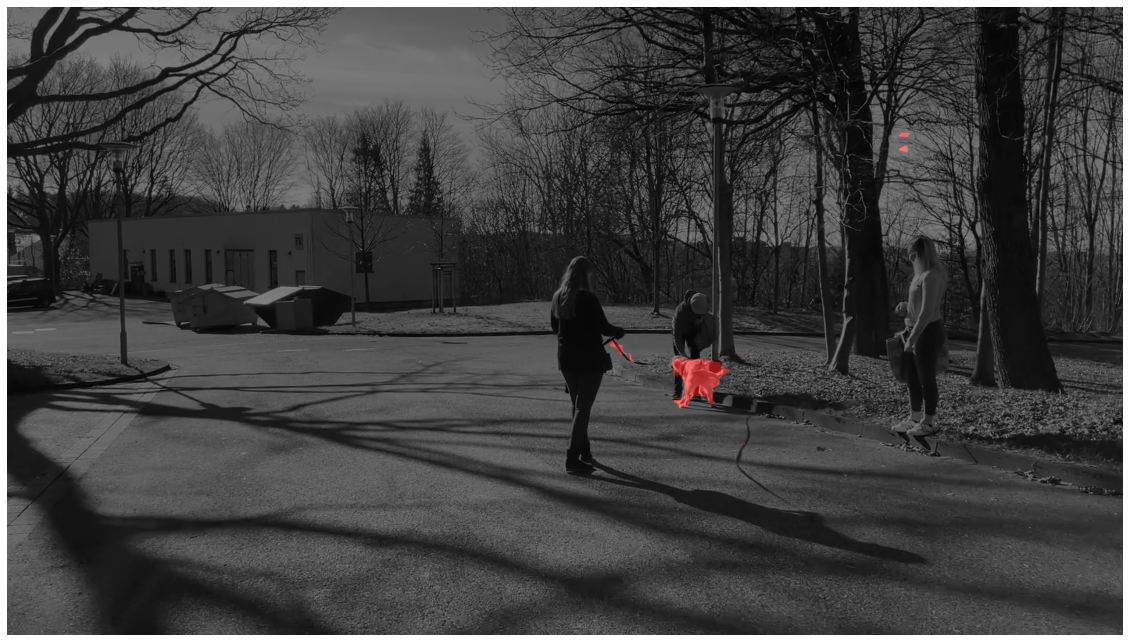

In [5]:
# threshold for anomaly score
threshold = 0.995

# use all 19 classes
model.eval_labels = np.arange(19).tolist()

out = model.evaluate(pil_img).detach().cpu().numpy()
score = out > threshold
blend = img_grayscale.copy()//2 
blend[:,:,0] += (128*(score).astype(np.uint8))

plt.figure(44, figsize=(20,20))
plt.imshow(blend)
plt.axis('off')
plt.show()